<a href="https://colab.research.google.com/github/qusaysellat/tensorflow-tutorial/blob/master/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THIS IS A SIMPLE LSTM RECURRENT NEURAL NETWORK TO CLASSIFY DIGIT IMAGES IN** *MNIST DATASET*

>NAME : [QUSAY SELLAT](https://github.com/qusaysellat)

>FOR MORE INFORMATION ABOUT 'MNIST' VISIT
[THIS SITE](http://yann.lecun.com/exdb/mnist/)

In [0]:
# lets start by importing necessary frameworks

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.contrib import rnn
tf.reset_default_graph()

In [0]:
# then we have to import our dataset

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [0]:
# lets try to play with this data set

# lets see the dimensions of train, validation, and test datasets - note that mnist is a named tupple
print("dimensions of images and labels of training set")
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

print("dimensions of images and labels of validation set")
print(mnist[1].images.shape)
print(mnist[1].labels.shape)

print("dimensions of images and labels of testing set")
print(getattr(mnist, 'test').images.shape)
print(getattr(mnist, 'test').labels.shape)

dimensions of images and labels of training set
(55000, 784)
(55000, 10)
dimensions of images and labels of validation set
(5000, 784)
(5000, 10)
dimensions of images and labels of testing set
(10000, 784)
(10000, 10)


In [0]:
# lets take a sample of our data and discover its values
print('the first 8 labels in the testing set:')
print(mnist[2].labels[:8])

the first 8 labels in the testing set:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


first 8 digits in the testing set:


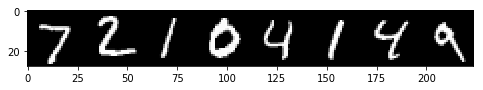

In [0]:
# now lets draw the sample we have just viewed

canvas = np.zeros((28, 28 * 8))
for i in range(8):
  canvas[:, 28 * i : 28 * (i + 1)] = mnist[2].images[i, :].reshape([28 ,28])
 
print("first 8 digits in the testing set:")
plt.figure(figsize = (8, 64))
plt.imshow(canvas, origin = 'upper', cmap ='gray')
plt.show()

In [0]:
# lets define used hyperparameters

LR = 0.001
batch_size = 128
steps = 10001

In [0]:
# then we define rnn network parameters

I = 28 # number of input features
O = 10 # number of output classes
T = 28 # number of timesteps
h = 128 # number of nodes in the hidden layer

In [0]:
# we will use two placeholders to represent variable input and output

X = tf.placeholder(dtype = tf.float32, shape = [None, T, I])
Y = tf.placeholder(dtype = tf.float32, shape = [None, O])

In [0]:
# then we have to define used weights and biases

W = {
    'W_output' : tf.Variable(tf.random_normal([h, O]))
}

b = {
    'b_output' : tf.Variable(tf.random_normal([O]))
}

In [0]:
# lets define forward propagation phase

def RNN_model(x, weights, biases) :
  
  # make the input made from a list of input values at different timesteps
  x = tf.unstack(x, T, 1)
  
  # define the LSTM cell
  lstm_cell = rnn.BasicLSTMCell(h, forget_bias = 1.0)
  
  # define recurrent operation
  outputs, last_state = rnn.static_rnn(lstm_cell, x, dtype = tf.float32)
  
  # define the logits
  logits = tf.matmul(outputs[-1], weights['W_output']) + biases['b_output']
  
  # return logits
  return logits

In [0]:
# lets continue defining our model

# get the logits
logits = RNN_model(X, W, b)

# apply softmax to get the predictions
preds = tf.nn.softmax(logits)
preds_classes = tf.argmax(preds, 1)

# define loss function
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits))

# define optimizer function
train_op = tf.train.GradientDescentOptimizer(LR).minimize(loss_op)

# define correct predicted images
correct_pred = tf.equal(tf.arg_max(preds, 1), tf.arg_max(Y, 1))

# define accuracy
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype = tf.float32))

# define variable initializer
init = tf.global_variables_initializer()

# to save the results
saver = tf.train.Saver()

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use `tf.math.argmax` instead


Step : 0 , Accuracy : 0.062
Step : 100 , Accuracy : 0.125
Step : 200 , Accuracy : 0.273
Step : 300 , Accuracy : 0.445
Step : 400 , Accuracy : 0.336
Step : 500 , Accuracy : 0.406
Step : 600 , Accuracy : 0.398
Step : 700 , Accuracy : 0.445
Step : 800 , Accuracy : 0.422
Step : 900 , Accuracy : 0.484
Step : 1000 , Accuracy : 0.500
Step : 1100 , Accuracy : 0.508
Step : 1200 , Accuracy : 0.438
Step : 1300 , Accuracy : 0.562
Step : 1400 , Accuracy : 0.617
Step : 1500 , Accuracy : 0.602
Step : 1600 , Accuracy : 0.555
Step : 1700 , Accuracy : 0.508
Step : 1800 , Accuracy : 0.633
Step : 1900 , Accuracy : 0.727
Step : 2000 , Accuracy : 0.617
Step : 2100 , Accuracy : 0.672
Step : 2200 , Accuracy : 0.633
Step : 2300 , Accuracy : 0.594
Step : 2400 , Accuracy : 0.602
Step : 2500 , Accuracy : 0.695
Step : 2600 , Accuracy : 0.617
Step : 2700 , Accuracy : 0.742
Step : 2800 , Accuracy : 0.688
Step : 2900 , Accuracy : 0.578
Step : 3000 , Accuracy : 0.711
Step : 3100 , Accuracy : 0.656
Step : 3200 , Accura

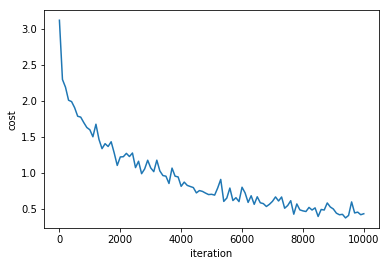

In [0]:
# now we have to train and evaluate our model

with tf.Session() as sess :
  
  # initialize variables
  sess.run(init)
  
  # initialize costs list
  costs = list()
  
  for i in range(steps) :
    
    # get next batch
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    
    # reshape inputs
    batch_x = batch_x.reshape([-1, T, I])
    
    # train the model
    _ = sess.run(train_op, feed_dict = {X : batch_x, Y : batch_y})
    
    # print accuracy
    if i % 100 == 0 :
      
      # get cost and accuracy
      c, a = sess.run([loss_op, accuracy], feed_dict = {X : batch_x, Y : batch_y})
      
      # add cost to costs list
      costs.append((i, c))
      
      # print accuracy
      print('Step : ' + str(i) +' , Accuracy : ' + '{:.3f}'.format(a))
      
  print('training finished successfully')
   
  print('notice how cost changes at every step')
    
  plt.ylabel('cost')
  plt.xlabel('iteration')
  plt.plot([i[0] for i in costs], [i[1] for i in costs])
  plt.show()
  
  # save the variables
  saving_path = saver.save(sess, '/tmp/rnnmodel.ckpt')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/rnnmodel.ckpt
cost on the test set : 0.401
accuracy on the test set : 0.877
lets see how our algorithm classified first 16 examples


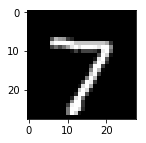

our algorithm predicted above digit as : 7



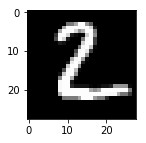

our algorithm predicted above digit as : 2



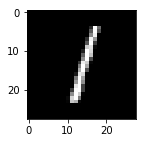

our algorithm predicted above digit as : 1



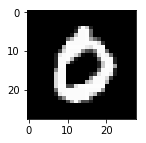

our algorithm predicted above digit as : 0



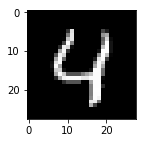

our algorithm predicted above digit as : 4



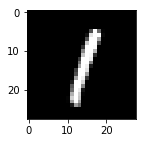

our algorithm predicted above digit as : 1



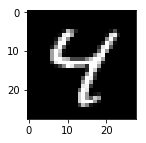

our algorithm predicted above digit as : 4



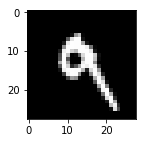

our algorithm predicted above digit as : 9



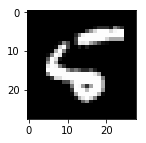

our algorithm predicted above digit as : 6



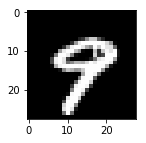

our algorithm predicted above digit as : 9



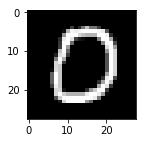

our algorithm predicted above digit as : 0



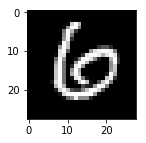

our algorithm predicted above digit as : 5



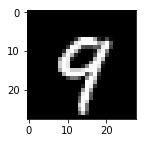

our algorithm predicted above digit as : 9



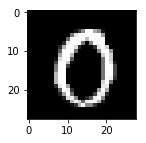

our algorithm predicted above digit as : 0



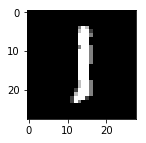

our algorithm predicted above digit as : 1



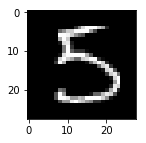

our algorithm predicted above digit as : 5



In [0]:
# lets examine our model on the test set

with tf.Session() as sess :
  
  saver.restore(sess, '/tmp/rnnmodel.ckpt')
  
  images = mnist.test.images.reshape([-1, T, I])
  labels = mnist.test.labels
  
  classes, c, a = sess.run([preds_classes, loss_op, accuracy], feed_dict = {X : images, Y : labels})
  
  print('cost on the test set : ' + '{:.3f}'.format(c))
  print('accuracy on the test set : ' + '{:.3f}'.format(a))
  
  print('lets see how our algorithm classified first 16 examples')
  
  for i in range(16):
    
    plt.figure(figsize = (2, 2))
    plt.imshow(images[i], origin = 'upper', cmap = 'gray')
    plt.show()
    print('our algorithm predicted above digit as : ' + str(classes[i]) + '\n')